# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})
    
    

### Przykład użycia

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
# plot.draw()

### Rozwiązanie


Otoczka:  [(508, 4), (960, 43), (994, 349), (989, 813), (828, 979), (567, 983), (198, 963), (47, 946), (3, 585), (2, 37), (10, 28), (172, 19)]


<IPython.core.display.Javascript object>


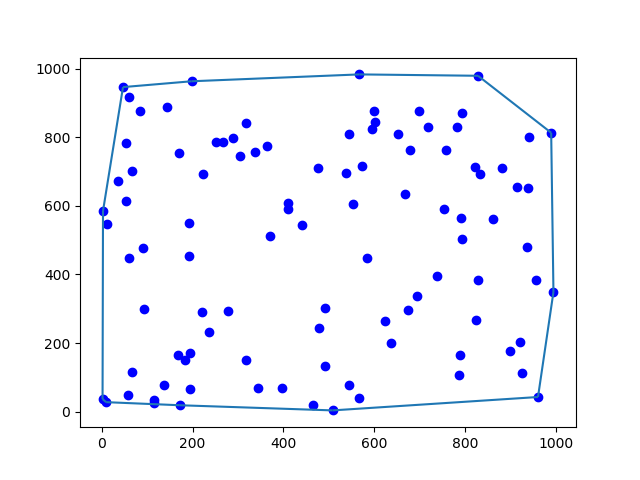

C:\Users\Michal\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [9]:
%matplotlib notebook

import math
import random

# punkty = [(7, 2), (11, 4), (13, 5), (11, 6), (12, 9), (9, 7), (8, 10),
#          (6, 9), (5, 5), (1, 7), (2, 3), (9, 2), (7, 4), (11, 2), (7, 6)]

def genPoints(l, r, n):
    points = []
    for x in range(n):
        points.append((random.randint(l,r), random.randint(l,r)))
    return points
    
punkty = genPoints(0, 1000, 100)

# Wybór p0 ###
punkty.sort(key=lambda x: (x[1], x[0]))
p0 = punkty[0]
# ###

# funkcja liczaca kąt nachylenia do osi 0X ###
def nachylenie_do_osi_x(ax, ay, bx, by):
    if ax == bx and ay == by: return None
    if ax == bx: return 'X'
    if ay == by: return 'Y'
    return ((ay - by) / (ax - bx))
# ###

# funkcja liczaca wyznacznik ###
def wyznacznik(ax, ay, bx, by, cx, cy):
    return (((ax - cx) * (by - cy)) - ((ay - cy) * (bx - cx)))
# >0 => lewa strona
# <0 => prawa strona
# =0 => na linii
# ###

# Tworzenie posortowanej po kącie względem p0 tablicy punktów ###
na_linii_z_y = []
na_linii_z_x = []
dodatnie_nachylenie = []
ujemne_nachylenie = []

for punkt in punkty:
    nachylenie = (nachylenie_do_osi_x(p0[0], p0[1], punkt[0], punkt[1]), punkt)
    if nachylenie[0] is None: continue
    elif nachylenie[0] == 'X': na_linii_z_x.append(nachylenie)
    elif nachylenie[0] == 'Y': na_linii_z_y.append(nachylenie)
    elif nachylenie[0] > 0: dodatnie_nachylenie.append(nachylenie)
    else: ujemne_nachylenie.append(nachylenie)

na_linii_z_y.sort(key=lambda x: x[1][0], reverse=True)
na_linii_z_x.sort(key=lambda x: x[1][0], reverse=True)
dodatnie_nachylenie.sort(key=lambda x: (x[0], x[1][0]))
ujemne_nachylenie.sort(key=lambda x: (x[0], x[1][0]))

nachylenia = []

if na_linii_z_y != []: nachylenia.append(na_linii_z_y[0][1])
tmp = []
for punkt in dodatnie_nachylenie: 
    if tmp == [] or punkt[0] == tmp[len(tmp) - 1][0]:
        tmp.append(punkt)
    else:
        nachylenia.append(tmp[len(tmp) - 1][1])
        tmp.append(punkt)
if tmp != []: nachylenia.append(tmp[len(tmp) - 1][1])
        
if na_linii_z_x != []: nachylenia.append(na_linii_z_x[0][1])
tmp = []
for punkt in ujemne_nachylenie: 
    if tmp == [] or punkt[0] == tmp[len(tmp) - 1][0]:
        tmp.append(punkt)
    else:
        nachylenia.append(tmp[len(tmp) - 1][1])
        tmp.append(punkt)
if tmp != []:nachylenia.append(tmp[len(tmp) - 1][1])
nachylenia.insert(0, p0)
# ###

# Wyliczanie właściwych punktów otoczki ###
i = 3
stos = []
stos.append(nachylenia[0])
stos.append(nachylenia[1])
stos.append(nachylenia[2])

while i < len(nachylenia):
    j = len(stos) - 2
    
    ax = stos[j][0]
    ay = stos[j][1]
    bx = stos[j + 1][0]
    by = stos[j + 1][1]
    cx = nachylenia[i][0]
    cy = nachylenia[i][1]
    
    wyz = wyznacznik(ax, ay, bx, by, cx, cy)
    if wyz > 0:
        stos.append(nachylenia[i])
        i += 1
    elif wyz < 0:
        stos.pop()
# ###

print("\nOtoczka: ", stos)
Plot([PointsCollection(punkty, color = 'blue')]).draw()

for i in range(len(stos)):
    if i > 0:
        Plot([PointsCollection([])], [LinesCollection([[stos[i-1],stos[i]]])]).draw()
Plot([PointsCollection([])], [LinesCollection([[stos[0],stos[len(stos) - 1]]])]).draw()